# Telecom Operator Project

## Introduction

In this project, we are going to analyze the data of a telecom operator. The company offers its users two prepaid plans, which we are going to research and determine which one of them brings more revenue to the company. In the end, the findings will help the commercial department to adjust its budget for advertising campaigns on the most profitable plan.

###  Open the date files and study the general information

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from functools import reduce
import seaborn as sns
from scipy.stats import levene

Now we will open all of the 5 data files and analyze them to get the first feeling of their content. 

In [2]:
calls_df = pd.read_csv('telecom_calls.csv')
web_df = pd.read_csv('telecom_internet.csv')
sms_df = pd.read_csv('telecom_messages.csv')
plans_df = pd.read_csv('telecom_plans.csv')
users_df = pd.read_csv('telecom_users.csv')

*1 calls_df*

In [3]:
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


Here we see instantly that there are no missing values in the calls DataFrame.

Also, we see that we have 4 columns and 137,735 rows. 

In [4]:
calls_df.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


Looking good! 

Here we see that we need to round the **duration** variable up later on in the analysis procedure.

In [5]:
calls_df.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


So here we see that there are calls that lasted 0 minutes. We will investigate it later on and decide what to do. 
(There is not much sense in the statistics of the **user_id** column, but just in case we concluded it in the describe method.) 

*2 web_df*

In [6]:
web_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


There are no missing values in the web DataFrame also.

Also, we see that we have 4 columns and 104,825 rows.

In [7]:
web_df.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


We see here that there are 0 megabytes used. We will investigate further on and determine what to do with these values. Also, we need to remember to sum all the web traffic per month and round it up.

In [8]:
web_df.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


As we noticed in the previous stage there are 0 megabytes that were used. We will check it. 

*3 sms_df*

In [9]:
sms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


I feel like it's my lucky day - no missing values!

Also, we see that we have 3 columns and 76,051 rows. 

In [10]:
sms_df.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


Looking good!

For this DataFrame there is no point in calling the describe method.

*4 plans_df*

In [11]:
plans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


No missing values! 

We also see that this DataFrame has only 2 rows and 8 columns.

In [12]:
plans_df.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


As we found earlier there are only 2 rows. Each row represents one of the plans with the monthly fees for each plan. 

For this DataFrame there is also no point in calling the describe method.

*5 users_df*

In [13]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Here we see that there are missing values in the **churn_date** column. We don't need this variable for our analysis, so it's not so bad.

Also, we see that there are 500 rows and 8 columns for this DataFrame. 500 rows for the 500 clients.

In [14]:
users_df.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


As we found earlier we see that the **churn_date** column has missing values. It's not a big deal since we don't need it for our investigation.  

In [15]:
users_df.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


Here we see the minimum age is 18, and the average age is about 45-46 years old. 

**Summary**

We opened 5 files and examined them. For all the DataFrames we used three main methods to learn about the five different data sets:
1. info() method
2. head() method
3. describe() method (when it was suitable)

We discovered that four out of five data sets lack missing values, and only one data set - **users_df** had missing values. But the good news is that we don't need this variable for our analysis, so it doesn't influence and we don't need to take care of it.

We noticed that there are calls that lasted 0 seconds and that there are users with 0 web traffic. We will investigate it in the next stage and decide how to treat them. 

We also saw the youngest clients is 18 years old and the average age of the customers is around 45-46 years old.


### Preparing the data

This stage consists of 3 parts:
1. Converting the data to the necessary type.
2. Find and eliminate errors in the data.
3. Finding for each user:
* Number of calls made and minutes used per month.
* Number of text messages sent per month.
* The volume of data per month.
* The monthly revenue. 

**1. Converting the data**

The variables types in all five data sets are characterized correctly, so there is no need to change the data type of any of the variables at this stage. Nevertheless, we will probably change the type to the summaries of the total minutes' calls, messages, and megabytes for faster calculation.  

**2. Finding and eliminating errors**

We found in the previous stage that there were some calls that last 0 seconds. There are 2 explanations for this:
* Maybe it's a missed call.
* Maybe it's a very short call that one side just said "I'll call you back", and the logs mechanism rounded it down (although the firm rounds the cost up). 

Let's find out how many calls with a duration of 0 we have.

In [16]:
len(calls_df[calls_df['duration'] == 0.00])

26834

We have 26,834 calls that lasted 0 seconds. That's actually not informative, so let's check that in percentages. 

In [17]:
len(calls_df[calls_df['duration'] == 0.00])/len(calls_df)

0.1948233927469416

Almost 20%  - That's a lot! We definitely can't drop them.

As we mentioned before, the logical explanation for these values is that it's missed calls or very short calls. So technically these calls happened and they are 'legit' even though they lasted 0 seconds. Therefore we can give them the value 1 instead of 0, and this way the analysis will be more elegant and clean.   

In [18]:
calls_df['duration_new'] = calls_df['duration'].where(calls_df['duration'] != 0.00, 1.00)
calls_df[calls_df['duration'] ==0.00].head()

,id,user_id,call_date,duration,duration_new
19,1001_4,1001,2018-12-05,0.0,1.0
25,1001_13,1001,2018-12-24,0.0,1.0
31,1001_30,1001,2018-10-17,0.0,1.0
32,1001_31,1001,2018-11-03,0.0,1.0
34,1001_35,1001,2018-12-21,0.0,1.0


In [19]:
len(calls_df[calls_df['duration'] ==0.00])

26834

We see that the number that we got above is equal to the number of 0 values - the change succeeded!

We also saw that there are 0 used megabytes in the internet traffic. Let's check how many such values we have.

In [20]:
len(web_df[web_df['mb_used'] == 0.00])

13747

And now in percentages.

In [21]:
len(web_df[web_df['mb_used'] == 0.00])/len(web_df)

0.1311423801574052

We have 13%  - That's also a lot!

We can't delete them. 

A logical explanation for these values to accrue is that maybe those users used so little of the web traffic that the logs mechanism rounded it down (although the firm rounds the cost up). Another explanation is that those users didn't use the web services even though they were included in the plan (old people for example or clients that went abroad to developing countries that don't always have internet infrastructure). So, as we did with the calls that lasted 0 seconds, we will change the 0 values to 1 for a more neat and accurate analysis.  

In [22]:
web_df['mb_used_new'] = web_df['mb_used'].where(web_df['mb_used'] != 0.00, 1.00)
web_df.head()

,id,user_id,session_date,mb_used,mb_used_new
0,1000_13,1000,2018-12-29,89.86,89.86
1,1000_204,1000,2018-12-31,0.00,1.00
2,1000_379,1000,2018-12-28,660.40,660.40
3,1000_413,1000,2018-12-26,270.99,270.99
4,1000_442,1000,2018-12-27,880.22,880.22


In [23]:
len(web_df[web_df['mb_used'] ==0.00])

13747

It's the same amount that was found in the previous stage - the change was done successfully. 

**3.A. For each user: Number of calls made and minutes used per month.**

First, let's create a month column and use the to_datetime and dt.month_name() methods for it.  

In [24]:
calls_df['month'] = pd.to_datetime(calls_df['call_date']).dt.month_name()
calls_df.head()

,id,user_id,call_date,duration,duration_new,month
0,1000_93,1000,2018-12-27,8.52,8.52,December
1,1000_145,1000,2018-12-27,13.66,13.66,December
2,1000_247,1000,2018-12-27,14.48,14.48,December
3,1000_309,1000,2018-12-28,5.76,5.76,December
4,1000_380,1000,2018-12-30,4.22,4.22,December


Now let's round the duration of the calls up. For that, we will use the ceil() method. 👆

In [25]:
calls_df['duration_new'] = np.ceil(calls_df['duration_new'])
calls_df.head()

,id,user_id,call_date,duration,duration_new,month
0,1000_93,1000,2018-12-27,8.52,9.0,December
1,1000_145,1000,2018-12-27,13.66,14.0,December
2,1000_247,1000,2018-12-27,14.48,15.0,December
3,1000_309,1000,2018-12-28,5.76,6.0,December
4,1000_380,1000,2018-12-30,4.22,5.0,December


Looking good! 

Now we will group the data by the **user_id** and **month** columns and see how many calls and minutes each user made in every month. We will use the groupby() method with named aggregation for that.

In [26]:
num_calls_user_per_month = calls_df.groupby(['user_id', 'month'])[['duration_new', 'id']].agg(
    duration = ('duration_new','sum'), num_calls = ('id', 'count')).reset_index()
num_calls_user_per_month['duration'] = num_calls_user_per_month['duration'].astype(int)
num_calls_user_per_month.head(15)

,user_id,month,duration,num_calls
0,1000,December,124,16
1,1001,August,187,27
2,1001,December,422,56
3,1001,November,441,64
4,1001,October,411,65
5,1001,September,326,49
6,1002,December,393,47
7,1002,November,393,55
8,1002,October,62,11
9,1003,December,1135,149


We can see above how many calls and how many minutes every user spent every month.

**3.B. For each user: Number of text messages sent per month.**

First, we will create a month column and then find the whole number of messages each user sent in each month.

In [27]:
sms_df['month'] = pd.to_datetime(sms_df['message_date']).dt.month_name()
sms_df.head()

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,December
1,1000_160,1000,2018-12-31,December
2,1000_223,1000,2018-12-31,December
3,1000_251,1000,2018-12-27,December
4,1000_255,1000,2018-12-26,December


Here we also going to use the groupby() method and count the number of messages.We will also use the to_frame method to give a neat look to the data.

In [28]:
sms_user_per_month = sms_df.groupby(['user_id', 'month'])['id'].count().reset_index()
sms_user_per_month.columns = ['user_id','month','messages']
sms_user_per_month.head()

,user_id,month,messages
0,1000,December,11
1,1001,August,30
2,1001,December,44
3,1001,November,36
4,1001,October,53


Let's move on.

**3.C. For each user: The volume of data per month.**

The way the telecom operator calculates the megabyte is different from the way it calculates the minute calls. For web traffic, per user, the telecom operator summarizes the web sessions for each month, and only then circles it upwards. So here we will first create a month column, group the data and only then calculate the volume of the data.

In [29]:
web_df['month'] = pd.to_datetime(web_df['session_date']).dt.month_name()
web_df.head()

,id,user_id,session_date,mb_used,mb_used_new,month
0,1000_13,1000,2018-12-29,89.86,89.86,December
1,1000_204,1000,2018-12-31,0.00,1.00,December
2,1000_379,1000,2018-12-28,660.40,660.40,December
3,1000_413,1000,2018-12-26,270.99,270.99,December
4,1000_442,1000,2018-12-27,880.22,880.22,December


Excellent!😎

Now let's group the data with the groupby() method by **user_id** and **mont** columns. Here also we will use the to_frame() for convenience. 

In [30]:
web_user_per_month = web_df.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()
web_user_per_month.head()

,user_id,month,mb_used
0,1000,December,1901.47
1,1001,August,6919.15
2,1001,December,19369.18
3,1001,November,18504.30
4,1001,October,22330.49


Now we will divide the **mb_used** column by 1,000 to convert it to gigabytes units and round it up. 

In [31]:
web_user_per_month['mb_used'] = np.ceil(web_user_per_month['mb_used']/1024).astype(int)
web_user_per_month.columns =['user_id','month','gb_used']
web_user_per_month.head()

,user_id,month,gb_used
0,1000,December,2
1,1001,August,7
2,1001,December,19
3,1001,November,19
4,1001,October,22


Looking great!

**3.D. From each user: The monthly revenue**

To calculate the revenue, first, we will merge the grouped data of each user. Then we will build a function and apply it to the merged data. 

*Merging the data sets*

In [32]:
df_list = [num_calls_user_per_month,sms_user_per_month, web_user_per_month]
merged_df = reduce(lambda left,right: pd.merge(left,right, on = ['user_id','month'],
                                               how = 'outer'), df_list).fillna(0)
total_df = pd.merge(right = merged_df,left = users_df[['user_id', 'plan']],
                   on = 'user_id', how = 'outer')
total_df.head()

,user_id,plan,month,duration,num_calls,messages,gb_used
0,1000,ultimate,December,124.0,16.0,11.0,2.0
1,1001,surf,August,187.0,27.0,30.0,7.0
2,1001,surf,December,422.0,56.0,44.0,19.0
3,1001,surf,November,441.0,64.0,36.0,19.0
4,1001,surf,October,411.0,65.0,53.0,22.0


*Building the function*

In [33]:
def revenue(df):
    # Defining variables to use within the function
    plan = df['plan']
    minutes = df['duration']
    sms = df['messages']
    gb = df['gb_used']
    cost = 0
    
    #Calculation of the revenue for users in the surf plan
    if plan == 'surf':
        cost = 20
        if minutes > 500:
            cost += (minutes-500)*0.03
        if sms > 50:
            cost += (sms-50)*0.03
        if gb > 15:
            cost += (gb-15)*10
            
    #Calculation of the revenue for users in the ultimate plan        
    if plan == 'ultimate':
        cost = 70
        if minutes > 3000:
            cost += (minutes-3000)*0.01
        if sms > 1000:
            cost += (sms-1000)*0.01
        if gb > 30:
            cost += (gb-30)*7
            
    return cost

In [34]:
total_df['total_revenue'] = total_df.apply(revenue, axis =1)
total_df.fillna(0, inplace = True)
total_df.head(10)

,user_id,plan,month,duration,num_calls,messages,gb_used,total_revenue
0,1000,ultimate,December,124.0,16.0,11.0,2.0,70.00
1,1001,surf,August,187.0,27.0,30.0,7.0,20.00
2,1001,surf,December,422.0,56.0,44.0,19.0,60.00
3,1001,surf,November,441.0,64.0,36.0,19.0,60.00
4,1001,surf,October,411.0,65.0,53.0,22.0,90.09
5,1001,surf,September,326.0,49.0,44.0,14.0,20.00
6,1002,surf,December,393.0,47.0,41.0,15.0,20.00
7,1002,surf,November,393.0,55.0,32.0,19.0,60.00
8,1002,surf,October,62.0,11.0,15.0,7.0,20.00
9,1003,surf,December,1135.0,149.0,50.0,27.0,159.05


In [35]:
total_df.isnull().sum()

user_id          0
plan             0
month            0
duration         0
num_calls        0
messages         0
gb_used          0
total_revenue    0
dtype: int64

Now we know the revenues from each client. 

**Summary**

In this stage we approached 3 main issues:

1. **Converting data** - We checked the variables and their types, and decided that there is no justified or logical need to convert thy data type of one of the variables. So we left them as they are and didn't touch them. 


2. **Finding and eliminating errors** - We found that the 2 DataFrames **calls_df** and **web_df** had 0 values that represented the duration of the calls and used megabytes respectively. We decided that it will be logical to change these values to 1 in both of the data sets. This the calculation will be more accurate and more 'clean'. 


3. **Finding for every user:**
* **Number of calls made and minutes used per month** - At first we created new **month** column by using the to_datetime() and dt.month_name() methods.Then we rounded the minutes up as the company's calculation method demands with the ceil() method and used the groupby() method to group the data by users and months. In the groupby() method we used named aggregation and the 'sum' and 'count' functions. 


* **Number of text messages sent per month** - Here we also at first created a month column. Then we used the groupby() method with the 'count' function to count the number of messages for each user every month.


* **The volume of data per month** - We created a month column at first. Then we summed the web sessions for each month, converted them to gigabytes, and rounded them up as the company's calculation method asked. For that we first used the groupby() method to group the data by users and months, summed all the web traffic for each month with the 'sum' function, divided the summaries by 1,000 (to convert to gigabytes), and rounded all up with the ceil() method. 


* **The monthly revenue** - At this stage first of all we merged all the grouped data sets that we created earlier with the reduce function. Then we added to the merged data the plan variable to complete our data frame for the calculation of the revenue. We used the merge() method for it. Afterward, we created a function that calculates the revenue with the fees that were given to us and applied it to our merged data set with the apply method. 

### Analyzing the data

At this stage, we are going to describe the clients' behavior. We will find the minutes, texts, and volume of data that each user require per month in each plan, by calculating the following:
1. Mean
2. Variance
3. Standart deviation

We will also plot histograms to get a better understanding of the distribution and how clients behave. 

We will use the merged data that we created earlier and apply the describe() method for each plan to find the 3 values above, and then use the plot() method for plotting the histograms.

**Surf**

In [36]:
total_df[total_df['plan'] == 'surf'].describe()

,user_id,duration,num_calls,messages,gb_used,total_revenue
count,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000
mean,1242.940469,438.651045,59.584547,31.041165,16.607346,60.743642
std,139.200115,241.368170,32.168377,33.557683,7.899502,55.407676
min,1001.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,1120.000000,276.500000,39.000000,3.000000,12.000000,20.000000
50%,1245.000000,437.000000,60.000000,24.000000,17.000000,40.360000
75%,1358.000000,590.500000,79.000000,47.000000,21.000000,80.705000
max,1499.000000,1548.000000,205.000000,266.000000,70.000000,591.270000


In [37]:
np.var(total_df[total_df['plan'] == 'surf']).to_frame()

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3700: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


,0
user_id,19364.400509
duration,58221.697736
num_calls,1034.149122
messages,1125.404892
gb_used,62.362606
total_revenue,3068.066245


**Ultimate**

In [38]:
total_df[total_df['plan'] == 'ultimate'].describe()

,user_id,duration,num_calls,messages,gb_used,total_revenue
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,1253.356354,439.987569,60.291436,37.343923,17.211326,72.301105
std,150.941802,248.226102,33.454527,34.782576,7.755841,11.364839
min,1000.000000,0.000000,0.000000,0.000000,0.000000,70.000000
25%,1126.000000,266.750000,36.000000,6.000000,13.000000,70.000000
50%,1246.000000,436.000000,61.000000,30.000000,17.000000,70.000000
75%,1401.000000,578.250000,79.250000,60.250000,21.000000,70.000000
max,1497.000000,1404.000000,191.000000,166.000000,46.000000,182.000000


In [39]:
np.var(total_df[total_df['plan'] == 'ultimate']).to_frame()

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3700: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


,0
user_id,22751.958647
duration,61531.092387
num_calls,1117.659540
messages,1208.156579
gb_used,60.069982
total_revenue,128.981159


Let's summarize what we found for every parameter:

**Minutes**

*Mean*
* Mean_Surf: 438.651045	
* Mean_Ultimate: 439.987569

*Variance*
* Variance_Surf: 58221.697736
* Variance_Ultimate: 61531.092387

*Std*
* Std_Surf: 241.368170
* Std_Ultimate: 248.226102

**Messages**

*Mean*
* Mean_Surf: 31.041165 	
* Mean_Ultimate: 37.343923

*Variance*
* Variance_Surf: 1125.404892
* Variance_Ultimate: 1208.156579

*Std*
* Std_Surf: 33.557683	
* Std_Ultimate: 34.782576

**Web_traffic**

*Mean*
* Mean_Surf: 16.972768	
* Mean_Ultimate: 17.621547

*Variance*
* Variance_Surf: 65.076522
* Variance_Ultimate: 63.160641

*Std*
* Std_Surf: 8.069558
* Std_Ultimate: 7.952861


We see that for minutes and web traffic the mean usage is almost equal, only for messages there is a difference of 6 messages - a 20% difference.

So at this point of our analysis, where we found that the customer of each plan uses almost the same amount of services that the basic surf plan provides, and the ultimate plan costs 3+ times more, it's will be interesting to see which plan brings more revenue. We will investigate it thoroughly at stage 4. 

Now let's plot a histogram for each parameter to get a better understanding, and to add some color to this project. 😀

**Minutes**

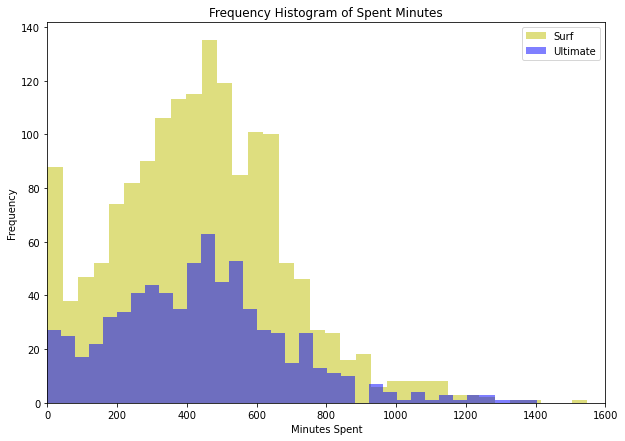

In [40]:
minutes_surf = total_df.loc[total_df['plan']=='surf', 'duration']
minutes_ultimate = total_df.loc[total_df['plan']=='ultimate', 'duration']

kwargs = dict(alpha=0.5, bins=35)
plt.figure(figsize=(10,7))
plt.hist(minutes_surf, **kwargs, color = 'y', label = 'Surf')
plt.hist(minutes_ultimate, **kwargs, color = 'b', label = 'Ultimate')
plt.gca().set(title = 'Frequency Histogram of Spent Minutes', ylabel = 'Frequency', xlabel = 'Minutes Spent')
plt.xlim(0, 1600)
plt.legend()
plt.show()

We see that histograms don't look the same because there is more datapoints for surf. we need to rectify the dominant plan surf and still maintain the separateness of the distribution. To do so we will normalize it and by doing this the total area under each distribution becomes 1.

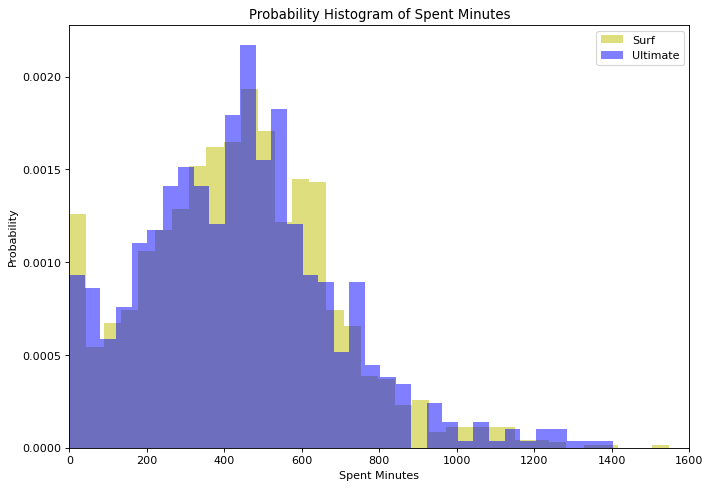

In [41]:
kwargs = dict(alpha=0.5, bins=35, density=True, stacked=True)
plt.figure(figsize=(10,7),dpi = 80)
plt.hist(minutes_surf, **kwargs, color = 'y', label = 'Surf')
plt.hist(minutes_ultimate, **kwargs, color = 'b', label = 'Ultimate')
plt.gca().set(title = 'Probability Histogram of Spent Minutes', ylabel = 'Probability', xlabel = 'Spent Minutes')
plt.xlim(0, 1600)
plt.legend()
plt.show()

Let's add to it some curves.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


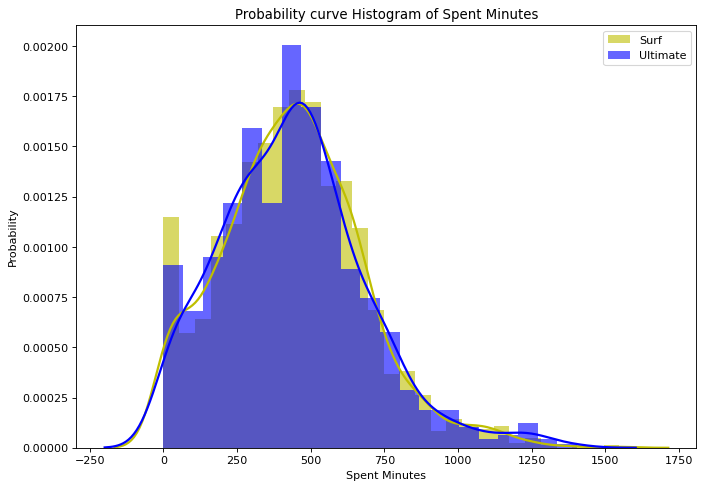

In [42]:
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(minutes_surf, color = 'y', label = 'Surf', **kwargs)
sns.distplot(minutes_ultimate, color = 'b', label = 'Ultimate', **kwargs)
plt.gca().set(title = 'Probability curve Histogram of Spent Minutes', ylabel = 'Probability', xlabel = 'Spent Minutes')
plt.legend()
plt.show()

We see that in all the histograms, the results matchs the findings that we got above. We see that the mean in both plans is around 440 minutes. 

**Messages**

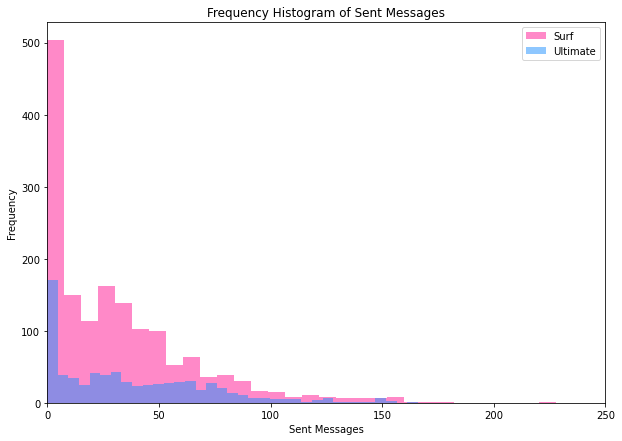

In [43]:
sms_surf = total_df.loc[total_df['plan']=='surf', 'messages']
sms_ultimate = total_df.loc[total_df['plan']=='ultimate', 'messages']

kwargs = dict(alpha=0.5, bins=35)
plt.figure(figsize=(10,7))
plt.hist(sms_surf, **kwargs, color = 'deeppink', label = 'Surf')
plt.hist(sms_ultimate, **kwargs, color = 'dodgerblue', label = 'Ultimate')
plt.gca().set(title = 'Frequency Histogram of Sent Messages', ylabel = 'Frequency', xlabel = 'Sent Messages')
plt.xlim(0, 250)
plt.legend()
plt.show()

Surprisingly here we also see that the surf plan dominates. So here we also need to normalize it so the area under the curve will be equal to 1.

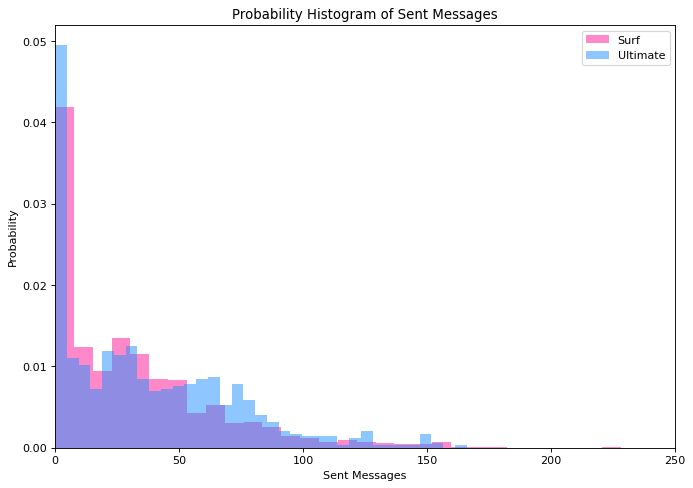

In [44]:
kwargs = dict(alpha=0.5, bins=35, density=True, stacked=True)
plt.figure(figsize=(10,7),dpi = 80)
plt.hist(sms_surf, **kwargs, color = 'deeppink', label = 'Surf')
plt.hist(sms_ultimate, **kwargs, color = 'dodgerblue', label = 'Ultimate')
plt.gca().set(title = 'Probability Histogram of Sent Messages', ylabel = 'Probability', xlabel = 'Sent Messages')
plt.xlim(0, 250)
plt.legend()
plt.show()

Let's add some lines to it!

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


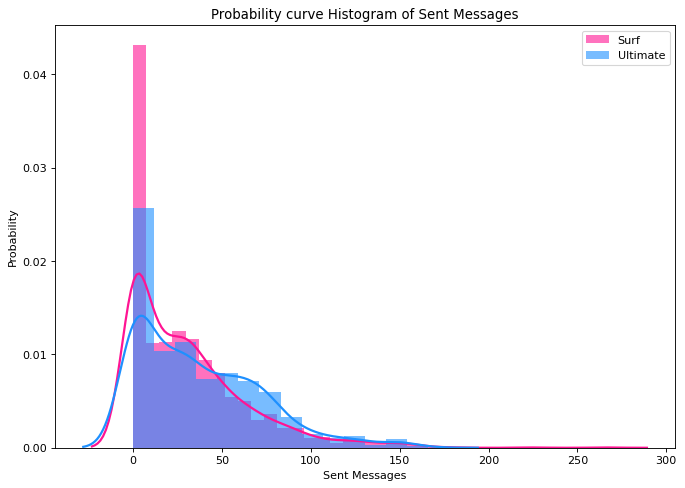

In [45]:
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(sms_surf, color = 'deeppink', label = 'Surf', **kwargs)
sns.distplot(sms_ultimate, color = 'dodgerblue', label = 'Ultimate', **kwargs)
plt.gca().set(title = 'Probability curve Histogram of Sent Messages', ylabel = 'Probability', xlabel = 'Sent Messages')
plt.legend()
plt.show()

We see similarities between the histograms. We see that many users that didn't send messages at all. These users pull the mean down, and it's lower than the median as we can see in the describe tables above. We see that most of the values all histograms are somewhere near the 30-40 messages, which matches the outputs that we saw earlier. 

**Web_Traffic**

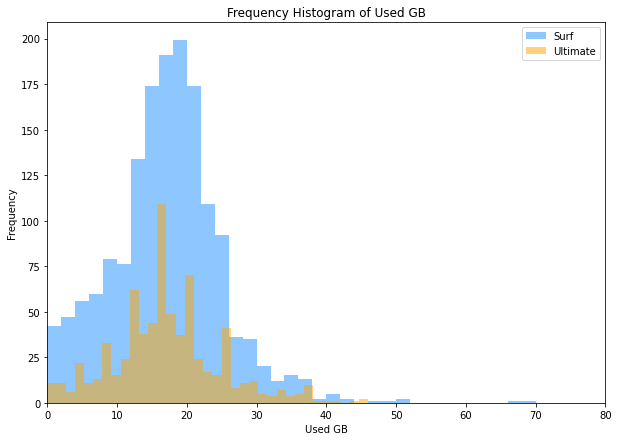

In [46]:
web_surf = total_df.loc[total_df['plan']=='surf', 'gb_used']
web_ultimate = total_df.loc[total_df['plan']=='ultimate', 'gb_used']
kwargs = dict(alpha=0.5, bins=35)
plt.figure(figsize=(10,7))
plt.hist(web_surf, **kwargs, color = 'dodgerblue', label = 'Surf')
plt.hist(web_ultimate, **kwargs, color = 'orange', label = 'Ultimate')
plt.gca().set(title = 'Frequency Histogram of Used GB', ylabel = 'Frequency', xlabel = 'Used GB')
plt.xlim(0, 80)
plt.legend()
plt.show()

Here we see that histograms don't look the same because there is more datapoints for surf.
we need to rectify the dominant class - surf and still maintain the separateness of the distribution. To do so we will normalize it and by doing this the total area under each distribution becomes 1. 

Let's go!😎

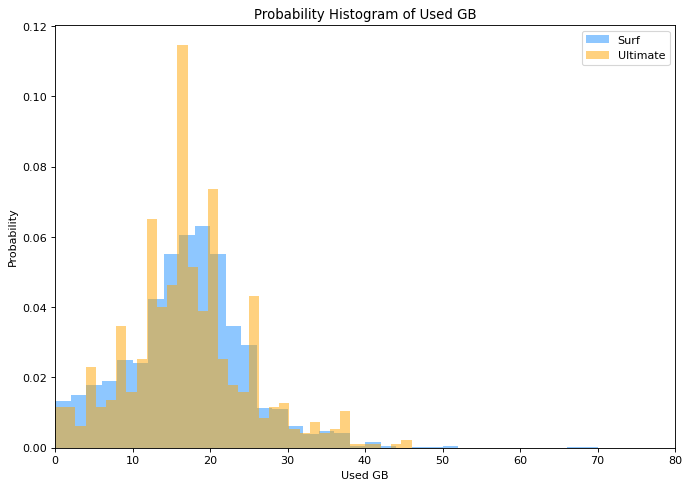

In [47]:
kwargs = dict(alpha=0.5, bins=35, density=True, stacked=True)
plt.figure(figsize=(10,7),dpi = 80)
plt.hist(web_surf, **kwargs, color = 'dodgerblue', label = 'Surf')
plt.hist(web_ultimate, **kwargs, color = 'orange', label = 'Ultimate')
plt.gca().set(title = 'Probability Histogram of Used GB', ylabel = 'Probability', xlabel = 'Used GB')
plt.xlim(0, 80)
plt.legend()
plt.show()

Now let's make it prettier.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


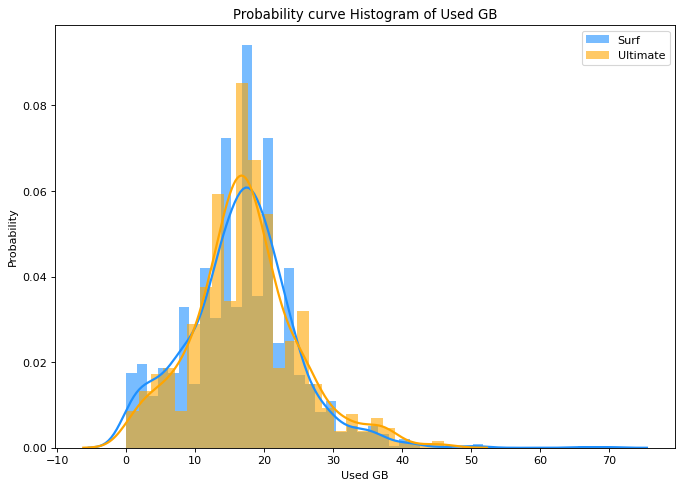

In [48]:
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(web_surf, color = 'dodgerblue', label = 'Surf', **kwargs)
sns.distplot(web_ultimate, color = 'orange', label = 'Ultimate', **kwargs)
plt.gca().set(title = 'Probability curve Histogram of Used GB', ylabel = 'Probability', xlabel = 'Used GB')
plt.legend()
plt.show()

As we found earlier we see that the mean is around 17 MG in all our beautiful and colorful graphs.👌

**Summary**

This step major goal was to understand the clients behavior in each plan with 2 approaches:
1. Calculation the following values for minutes, messages, and GB in each plan:
* Mean
* Variance
* Standart deviation
2. Plotting a histogram to each parameter in each plan.

We plotted 3 different histograms for each parameter. A regular frequency histogram then normalized probability histogram and an upgraded probability histogram with curves (also normalized of course). The histogram demonstrated us what we found, that the clients of the 2 plans consume almost the same amount of services. 


All this information made us understand that the clients in both plans are acting the same and require almost the same amount of services that are provided by the basic surf plan. So, when considering that the ultimate plan in 3+ times more expensive than the surf plan, it will be interesting to see which plan is more profitable.🤗

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or mis

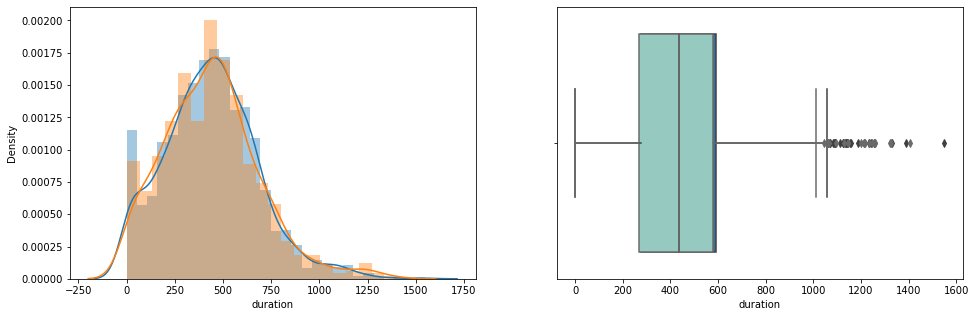

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
sns.distplot(minutes_surf, ax=axes[0])
sns.distplot(minutes_ultimate, ax=axes[0])
sns.boxplot(minutes_surf, ax=axes[1])
sns.boxplot(minutes_ultimate, ax=axes[1],palette="Set3" )
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or mis

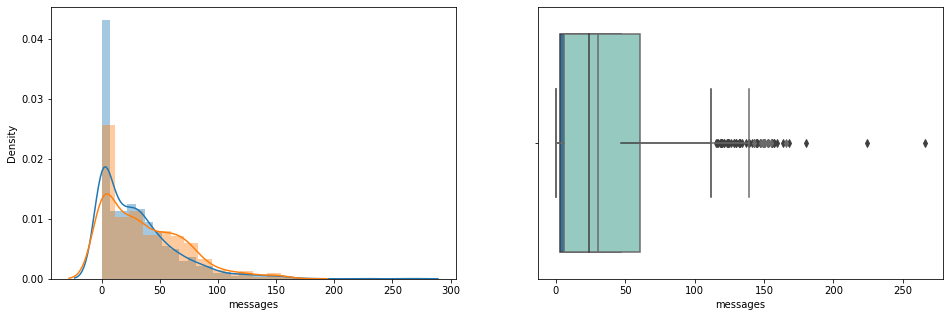

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
sns.distplot(sms_surf, ax=axes[0])
sns.distplot(sms_ultimate, ax=axes[0])
sns.boxplot(sms_surf, ax=axes[1])
sns.boxplot(sms_ultimate, ax=axes[1],palette="Set3" )
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or mis

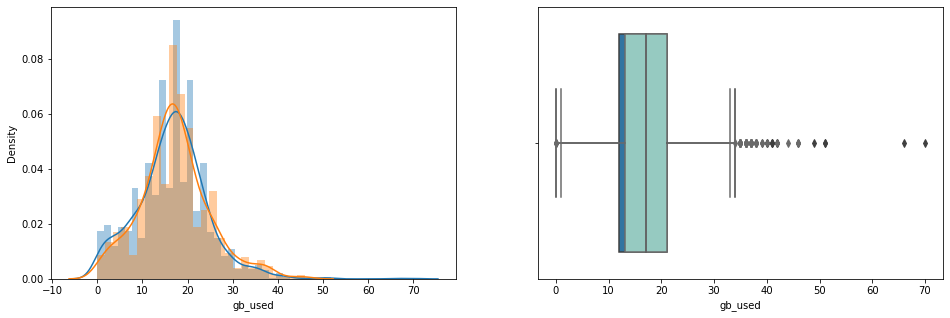

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
sns.distplot(web_surf, ax=axes[0])
sns.distplot(web_ultimate, ax=axes[0])
sns.boxplot(web_surf, ax=axes[1])
sns.boxplot(web_ultimate, ax=axes[1],palette="Set3" )
plt.show()

### Testing the hypotheses

At this stage we are going to test 2 hypotheses:
1. The average revenue from users of Ultimate and Surf calling plans differs.
2. The average revenue from users in NY-NJ area is different from that of the users from other regions.

To test these hypotheses we will do the following:
1. Formulate 2 samples test.
2. We will see if the samples are paired or not.
3. If the samples are not paired, we will check the equality of their variances and perform t-test.  

Let's go investigate!🕵️‍♀️

**Hypotesis 1: The average revenue from users of Ultimate and Surf calling plans differs**

We will now set the hypotheses. It is known that the Null hypothesis is always about the equality of the 2 average samples, so the hypothesis will be set this way:

* **H0**: The average revenue from users of Ultimate and Surf calling plans is the same

* **H1**: The average revenue from users of Ultimate and Surf calling plans differ

**Alpha:** We will set alpha=0.05 as it is a golden standard, and it's good enough for our case. In medicine value of alpha=0.01 is acceptable, but we are not testing medical issues so alpha=0.05 will be enough for us.

**step 1:** Let's find the 2 samples:
* Revenues of the Surf plan users
* Revenues of the Ultimate plan users

In [52]:
revenue_surf = total_df.loc[total_df['plan'] == 'surf', 'total_revenue']
revenue_ultimate = total_df.loc[total_df['plan'] == 'ultimate', 'total_revenue']

**step 2:** Checking if the samples are paired or not.

The samples of the 2 plans are not paired because:
1. The clients of each plan are not the same and independent. 
2. We are not testing the clients' behavior before and after changing any factor like the price.

**step 3:** Checking the equality of the variances and performing a t-test.

To check the variences, we will use levene test.

The hypothesis is:

* **H0:** The variances are equal
* **H1:** The variances aren't equal

**Alpha:** Here also we will set alpha = 0.05, because 5% is good enogh for us. 

In [53]:
alpha = 0.05

stat, p = levene (revenue_surf, revenue_ultimate)

print('p - value:', p)
if p < alpha:
    print("We reject the null hypothesis. The variences aren't equal.")
if p > alpha:
    print("We can't reject the null hypothesis. The variences are equal.")

p - value: 2.1097427127193595e-83
We reject the null hypothesis. The variences aren't equal.


In [54]:
alpha = 0.05

results = st.ttest_ind(revenue_surf, revenue_ultimate, equal_var = False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('we reject the null hypothesis. The average revenue differ.')
else:
    print("we can't the null hypothesis. The average revenue is the same.")

p-value: 3.682500132410648e-15
we reject the null hypothesis. The average revenue differ.


So here we see that the average revenue of the plans is not the same. Interesting!

Let's plot few histogrmas of the revenue to get a closer look.

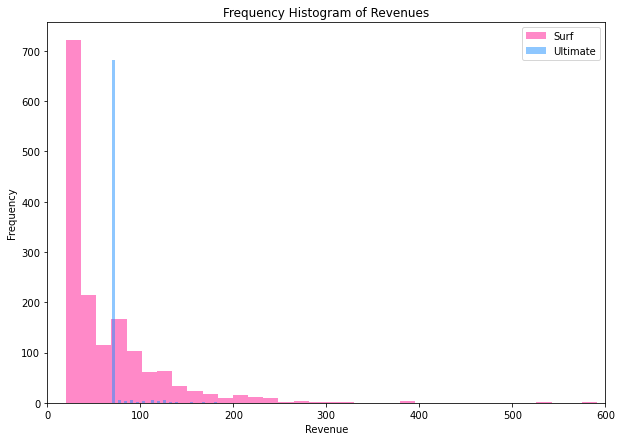

In [55]:
kwargs = dict(alpha=0.5, bins=35)
plt.figure(figsize=(10,7))
plt.hist(revenue_surf, **kwargs, color = 'deeppink', label = 'Surf')
plt.hist(revenue_ultimate, **kwargs, color = 'dodgerblue', label = 'Ultimate')
plt.gca().set(title = 'Frequency Histogram of Revenues', ylabel = 'Frequency', xlabel = 'Revenue')
plt.xlim(0, 600)
plt.legend()
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


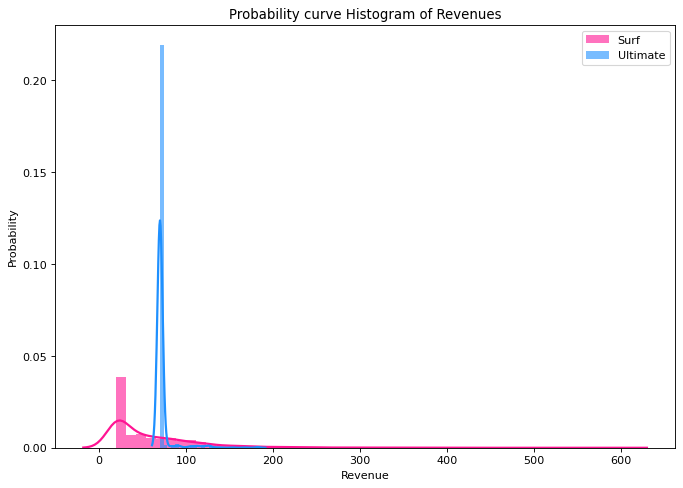

In [56]:
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(revenue_surf, color = 'deeppink', label = 'Surf', **kwargs)
sns.distplot(revenue_ultimate, color = 'dodgerblue', label = 'Ultimate', **kwargs)
plt.gca().set(title = 'Probability curve Histogram of Revenues', ylabel = 'Probability', xlabel = 'Revenue')
plt.legend()
plt.show()

The histograms reinforce the results above and show us that the distribution of the plans differs and doesn't act the same. The statistics on both plans are very different. We can see that the revenues that come from the surf plan are bigger than the revenues that come from the ultimate plan. There are a few outliers, but we see clearly that many customers in the surf plan significantly deviate from the basic package and pay much more than 20 (dollars?), but rather 80-100 (and above). 

**Hypotesis 2: The average revenue from users in NY-NJ area is different from that of the users from other regions**

We will now set the hypotheses with the same principles in the 1st hypothsis:

* **H0**: The average revenue from users in NY-NJ area  and users from other regions is the same

* **H1**: The average revenue from users in NY-NJ area and users from other regions differ

**Alpha:** Here also we will set alpha=0.05, as 5% is enough for us.

**step 1:** Let's find the 2 samples:

* Revenues of users in NY-NJ area
* Revenues of users from other regions

To do so, first we need to add the **city** column from users_df file to the total_df data set. 

In [57]:
total_df_city = pd.merge(right =total_df, left = users_df[['user_id','city']], how = 'outer', on = 'user_id' )
total_df_city.head(3)

,user_id,city,plan,month,duration,num_calls,messages,gb_used,total_revenue
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,December,124.0,16.0,11.0,2.0,70.0
1,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,August,187.0,27.0,30.0,7.0,20.0
2,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,December,422.0,56.0,44.0,19.0,60.0


Looking good!

Now let's define the samples.

In [58]:
total_df_city['city'].value_counts()

New York-Newark-Jersey City, NY-NJ-PA MSA          378
Los Angeles-Long Beach-Anaheim, CA MSA             132
Chicago-Naperville-Elgin, IL-IN-WI MSA              94
Dallas-Fort Worth-Arlington, TX MSA                 89
Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA     82
                                                  ... 
Omaha-Council Bluffs, NE-IA MSA                      3
El Paso, TX MSA                                      2
Jacksonville, FL MSA                                 2
Raleigh-Cary, NC MSA                                 2
Cape Coral-Fort Myers, FL MSA                        1
Name: city, Length: 73, dtype: int64

In [59]:
revenue_ny_ng = total_df_city.loc[total_df_city['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA', 'total_revenue']
revenue_other_areas = total_df_city.loc[total_df_city['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA', 'total_revenue']

**step 2:** Checking if the samples are paired or not.

The samples of the areas are not paired because:
1. The clients of each erea are not the same and independent. 
2. We are not testing the clients' behavior before and after changing any factor like the price.

**step 3:** Checking the equality of the variances and performing a t-test.

To check the variences, we will use levene test.

The hypothesis is:

* **H0:** The variances are equal
* **H1:** The variances aren't equal

**Alpha:** Here also we will set alpha = 0.05, because 5% is good enogh for us.

In [60]:
alpha = 0.05

stat, p = levene (revenue_ny_ng, revenue_other_areas)

print('p - value:', p)
if p < alpha:
    print("We reject the null hypothesis. The variences aren't equal.")
if p > alpha:
    print("We can't reject the null hypothesis. The variences are equal.")

p - value: 0.13064227376699264
We can't reject the null hypothesis. The variences are equal.


In [61]:
alpha = 0.05

results = st.ttest_ind(revenue_ny_ng, revenue_other_areas)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('we reject the null hypothesis. The average revenue differ.')
else:
    print("we can't the null hypothesis. The average revenue is the same.")

p-value: 0.05145506315235809
we can't the null hypothesis. The average revenue is the same.


Let's plot some histograms. 😍

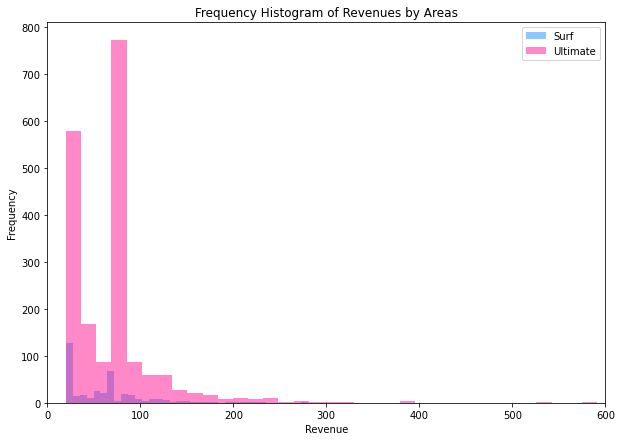

In [62]:
kwargs = dict(alpha=0.5, bins=35)
plt.figure(figsize=(10,7))
plt.hist(revenue_ny_ng, **kwargs, color = 'dodgerblue', label = 'Surf')
plt.hist(revenue_other_areas, **kwargs, color = 'deeppink', label = 'Ultimate')
plt.gca().set(title = 'Frequency Histogram of Revenues by Areas', ylabel = 'Frequency', xlabel = 'Revenue')
plt.xlim(0, 600)
plt.legend()
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


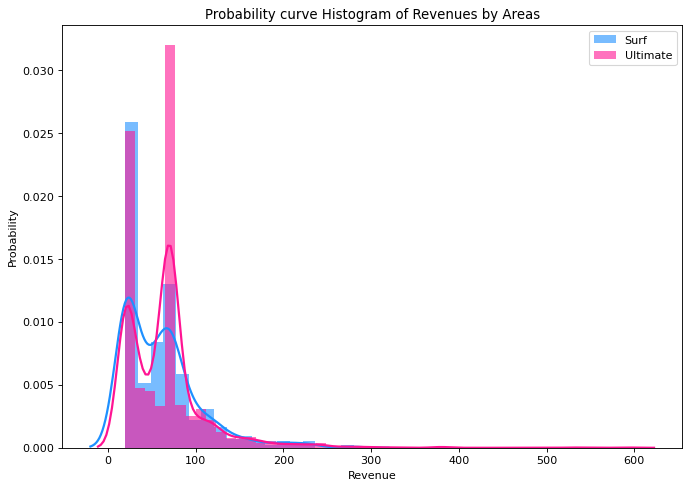

In [63]:
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(revenue_ny_ng, color = 'dodgerblue', label = 'Surf', **kwargs)
sns.distplot(revenue_other_areas, color = 'deeppink', label = 'Ultimate', **kwargs)
plt.gca().set(title = 'Probability curve Histogram of Revenues by Areas', ylabel = 'Probability', xlabel = 'Revenue')
plt.legend()
plt.show()

The histograms show us that the distribution of the areas is very similar. This means that the region doesn't affect clients' behavior and that in all regions customers act the same and spend a similar amount of money.

**Summary**

In this step we checked 2 hypotheses:
1. The average revenue from users of Ultimate and Surf calling plans differs.
2. The average revenue from users in NY-NJ area is different from that of the users from other regions.

Testing the hypotheses included 3 main steps:
1. We set the right samples for each hypothesis.
2. We checked if the samples were paired.
3. We checked the variances of the samples with the Levene test and then formulated t-test according to the result of variances equality. 
 
We found that:
1. First of all we determined for the 2 hypotheses that alpha = 0.05, because 5% is enough for our analysis. 
2. The samples in both hypotheses are independent and not paired.
3. The samples variances:
* In the first hypothesis is **different**.
* In the second hypothesis is **the same**.

Then we conducted t-test according to the outputs above and determined that:
* **1st hypothesis:** We reject the null hypothesis. The average revenue between the plan differ. 
* **2nd hypothesis:** We can't reject the null hypothesis. The average revenue of all areas is the same. 

Then we plotted histograms (regular and curved probability) for each hypothesis with the appropriate samples to get a better understanding. The histograms supported the findings of the test and let to the following:

1. The average revenue of the plans is different. The revenue from the surf plan is bigger than from the ultimate plan. It seems that the basic package of the surf isn't enough for its users so they many times tend to deviate and use more services, and therefore pay more than 20, but somewhere around 80-100 and above. 


2. The average revenue of the NY-NJ area is the same as in other regions. The city where people live doesn't have an influence on the revenue of the users. In every region the clients act the same and spend a similar amount of money on phones and web services. 

And now, to the overall conclusion we go!💪


### Overall conclusion

First let's remember what we did:

**In 1st stage** We opened 5 files and  examined them. For all the DataFrames we used three main methods to learn about the five different data sets:

info() method
head() method
describe() method (when it was suitable)
We discovered that four out of five data sets lack missing values, and only one data set - users_df had missing values. But the good news is that we don't need this variable for our analysis, so it doesn't influence and we don't need to take care of it.

We noticed that there are calls that lasted 0 seconds and that there are users with 0 web traffic. We also saw the youngest clients is 18 years old and the average age of the customers is around 45-46 years old.

**The second stage** were all about prepering the data. In this stage we approached 3 main issues:

1. **Converting data** - We checked the variables and their types, and decided that there is no justified or logical need to convert thy data type of one of the variables. So we left them as they are and didn't touch them. 


2. **Finding and eliminating errors** - We found that the 2 DataFrames **calls_df** and **web_df** had 0 values that represented the duration of the calls and used megabytes respectively. We decided that it will be logical to change these values to 1 in both of the data sets. This the calculation will be more accurate and more 'clean'. 


3. **Finding for every user:**
* **Number of calls made and minutes used per month** - At first we created new **month** column by using the to_datetime() and dt.month_name() methods.Then we rounded the minutes up as the company's calculation method demands with the ceil() method and used the groupby() method to group the data by users and months. In the groupby() method we used named aggregation and the 'sum' and 'count' functions. 


* **Number of text messages sent per month** - Here we also at first created a month column. Then we used the groupby() method with the 'count' function to count the number of messages for each user every month.


* **The volume of data per month** - Surprisingly😅 we created a month column at first. Then we summed the web sessions for each month, converted them to gigabytes, and rounded them up as the company's calculation method asked. For that we first used the groupby() method to group the data by users and months, summed all the web traffic for each month with the 'sum' function, divided the summaries by 1,000 (to convert to gigabytes), and rounded all up with the ceil() method. 


* **The monthly revenue** - At this stage first of all we merged all the grouped data sets that we created earlier with the reduce function. Then we added to the merged data the plan variable to complete our data frame for the calculation of the revenue. We used the merge() method for it. Afterward, we created a function that calculates the revenue with the fees that were given to us and applied it to our merged data set with the apply method. 

**In the 3th stage** we analyzed the data.

This step major goal was to understand the clients behavior in each plan with 2 approaches:
1. Calculation the following values for minutes, messages, and GB in each plan:
* Mean
* Variance
* Standart deviation
2. Plotting a histogram to each parameter in each plan.

We plotted 3 different histograms for each parameter. A regular frequency histogram then normalized probability histogram and an upgraded probability histogram with curves (also normalized of course). The histogram demonstrated us what we found, that the clients of the 2 plans consume almost the same amount of services. 


All this information made us understand that the clients in both plans are acting the same and require almost the same amount of services that are provided by the basic surf plan. So, when considering that the ultimate plan in 3+ times more expensive than the surf plan, it will be interesting to see which plan is more profitable.🤗

**The 4th stage** was all about testing the hypothesis. 

In this step we checked 2 hypotheses:
1. The average revenue from users of Ultimate and Surf calling plans differs.
2. The average revenue from users in NY-NJ area is different from that of the users from other regions.

Testing the hypotheses included 3 main steps:
1. We set the right samples for each hypothesis.
2. We checked if the samples were paired.
3. We checked the variances of the samples with the Levene test and then formulated t-test according to the result of variances equality. 
 
We found that:
1. First of all we determined for the 2 hypotheses that alpha = 0.05, because 5% is enough for our analysis. 
2. The samples in both hypotheses are independent and not paired.
3. The samples variances:
* In the first hypothesis is **different**.
* In the second hypothesis is **the same**.

Then we conducted t-test according to the outputs above and determined that:
* **1st hypothesis:** We reject the null hypothesis. The average revenue between the plan differ. 
* **2nd hypothesis:** We can't reject the null hypothesis. The average revenue of all areas is the same. 

Then we plotted histograms (regular and curved probability) for each hypothesis with the appropriate samples to get a better understanding. The histograms supported the findings of the test and let to the following:

1. The average revenue of the plans is different. The revenue from the surf plan is bigger than from the ultimate plan. It seems that the basic package of the surf isn't enough for its users so they many times tend to deviate and use more services, and therefore pay more than 20, but somewhere around 80-100 and above. 


2. The average revenue of the NY-NJ area is the same as in other regions. The city where people live doesn't have an influence on the revenue of the users. In every region the clients act the same and spend a similar amount of money on phones and web services. 

So we did all these actions to see which plan bring more profit to inform the commercial department on which plan it will be best to invest in advertising. 

From all the findings above we see that the revenue of the surf plan is greater than the ultimate plan. Also, we discovered that the place of residence doesn't affect the behavior of the clients and in all regions, customers spend the same amount of money. 
So, we will recommend to the commercial department to adjust the budget in a way that emphasizes the surf plan in all regions. In other words, we will recommend concentrating on advertising the surf plan in the same way for all cities.

Biana.